In [46]:
#WORK IN PROGRESS

import matplotlib.pyplot as  plt
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt

#Poco popular = Valor 0 = [0, 50]
#Popular = Valor 1 = (50, 61]
#Muy popular = Valor 2 = (61, 67]
#Super popular = Valor 3 = (67, 100]

df=pd.read_csv("../datasets/SpotifyDataset.csv",header=None)
df.columns = df.iloc[0]
df = df.drop(0)
df.columns = df.columns.fillna('to_drop')
df.drop('to_drop', axis = 1, inplace = True)
df.head()
df.popularity.value_counts()

1    4586
3    2081
2    2025
Name: popularity, dtype: int64

In [2]:
X = df.drop(['popularity'],axis=1).values  
y = df['popularity'].values
print(X.shape)
print(y.shape)

(8692, 20)
(8692,)


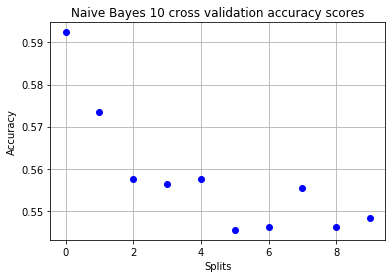

In [32]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score, train_test_split
import sklearn.neighbors as nb

cv = StratifiedKFold(n_splits=10, random_state=1) 

gnb = GaussianNB()
cv_scores = cross_val_score(gnb,X=X,y=y,cv=cv)
np.mean(cv_scores)
plt.plot(cv_scores,"bo")
plt.title('Naive Bayes 10 cross validation accuracy scores')
plt.ylabel('Accuracy')
plt.xlabel('Splits')
plt.grid(True)

In [33]:
from sklearn.model_selection import cross_val_predict  
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

predicted = cross_val_predict(GaussianNB(), X=X, y=y,  cv=cv)

print(confusion_matrix(y, predicted))
print(accuracy_score(y, predicted))

[[4512    0   74]
 [1931    0   94]
 [1744    0  337]]
0.5578693051081455
